# Helen Hammond's Module 4 Project

### Date: Feb 18 2023

# Task 3 - Exploratory Data Project

1.	Use everything you've learned to conduct a unique data exploration project using some information related to your domain. 
2.	Tell a story with data (do a web search to learn more).
3.	Use this project to feature all of the key skills learned - creating a professional notebook, writing a good README.md (do a web search). 
4.	Include challenging Python programming aspects - find a reason to use filter(), map(), and list comprehensions.
5.	Have fun and make it unique.


## Allegheny County Employee Salaries

We shall be looking at annual salary, regular pay, incentive pay, and gross pay for employees under the County Executive and independently elected County officials for the years 2016 to the present

## 1 - Read

Import pandas library for data analysis

In [1341]:
import pandas as pd

Read in the CSV file

In [1342]:
salaries_df = pd.DataFrame(pd.read_csv('allegheny_county_employees_salaries.csv', skipinitialspace = True))

Remove spaces in the column names

In [1343]:
salaries_df.columns = salaries_df.columns.str.replace(' ', '')

Remove commas and dashes in the data

In [1344]:
salaries_df.replace(',','', regex=True, inplace=True)
salaries_df.replace('-','', regex=True, inplace=True)

Display the column names

In [1345]:
salaries_df.columns

Index(['FIRST_NAME', 'LAST_NAME', 'DEPARTMENT', 'JOB_TITLE',
       'ELECTED_OFFICIAL', 'DATE_STARTED', 'SEX', 'ETHNICITY', 'ORIG_START',
       'DATE_TERM', 'PAY_STATUS', 'ANNUAL_SALARY', 'REGULAR_PAY',
       'OVERTIME_PAY', 'INCENTIVE_PAY', 'GROSS_PAY'],
      dtype='object')

Display the top 5 rows in the dataframe

In [1346]:
salaries_df.head()

,FIRST_NAME,LAST_NAME,DEPARTMENT,JOB_TITLE,ELECTED_OFFICIAL,DATE_STARTED,SEX,ETHNICITY,ORIG_START,DATE_TERM,PAY_STATUS,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY
0,CATHERINE,ABALO,Kane Regional Centers,NURSING ASSISTANT,0,4/8/2010,F,Black,7/6/2009,NaN,Active,41581.07,40740.50,23416.98,125.00,64282.48
1,KEVIN J,ABBOTT,Emergency Management,FIRE INSTRUCTORPART TIME,0,6/11/2018,M,White (Not of Hispanic Origin),6/11/2018,NaN,Active,30576.00,378.00,NaN,NaN,378.00
2,JOY M,ABBOTT,Kane Regional Centers,COOK,0,2/14/1999,F,White (Not of Hispanic Origin),2/2/1998,NaN,Active,40761.76,44015.85,1923.77,225.00,46164.62
3,ELIZABETH S,ABRAHAM,Parks,SEASONAL AIDE,0,5/26/2022,F,White (Not of Hispanic Origin),5/26/2022,9/5/2022,Terminated,39936.00,6488.00,NaN,100.00,6588.00
4,JASMINE,ABRAM,Emergency Management,TELECOMMUNICATION OFFICER,0,5/23/2022,F,Black,5/31/2016,NaN,Active,52240.03,25637.96,15994.95,125.00,41757.91


## 2 - Statistics

Change the string columns to numeric

In [1347]:
salaries_df[['ANNUAL_SALARY', 'REGULAR_PAY', 'OVERTIME_PAY', 'INCENTIVE_PAY', 'GROSS_PAY']] = salaries_df[['ANNUAL_SALARY', 'REGULAR_PAY', 'OVERTIME_PAY', 'INCENTIVE_PAY', 'GROSS_PAY']].apply(pd.to_numeric)

Set the precision to 2 decimal places

In [1348]:
pd.options.display.precision = 2

Determine the mean annual salary

In [1349]:
avg_annual_salary = salaries_df['ANNUAL_SALARY'].mean()
max_annual_salary = salaries_df['ANNUAL_SALARY'].max() # Maximum salary
avg_annual_salary

55947.46600477707

Find the median annual salary

In [1350]:
salaries_df['ANNUAL_SALARY'].std()

22630.68417416379

What is the mode in the sex column

In [1351]:
salaries_df['SEX'].mode()

0    M
Name: SEX, dtype: object

From the mode() function, we found that the dataset contains more male employees.

Let's look at the actual counts of the sex values.

In [1352]:
salaries_df['SEX'].value_counts()

M    3187
F    3093
Name: SEX, dtype: int64

So what's the summary of annual salary for each sex?

In [1353]:
salaries_df.groupby('SEX')['ANNUAL_SALARY'].describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
F,3093.0,51903.54,19923.32,7540.00,39936.00,46751.33,59633.81,269250.18
M,3187.0,59872.11,24348.21,5666.96,43100.51,53767.58,75998.62,235750.11


From this, we can tell that the average pay of the male workers is generally higher than of the females. 

Nonetheless, there is 1 female who is paid higher than the highest-paid male;

In [1354]:
# Females dataframe
female_df = salaries_df[salaries_df['SEX'] == 'F']

# Maximum pay of the males
max_male_pay = salaries_df[salaries_df['SEX'] == 'M']['ANNUAL_SALARY'].max()

# Females paid higher than the highest-paid male
female_higher_pay_df = female_df[female_df['ANNUAL_SALARY'] > max_male_pay]
len(female_higher_pay_df)

1

## 3 - Built-in functions

Find the minimum annual salary

In [1355]:
salaries_df['ANNUAL_SALARY'].min()

5666.96

Find the maximum annual salary

In [1356]:
salaries_df['ANNUAL_SALARY'].max()

269250.18

How many columns are in the dataframe?

In [1357]:
len(salaries_df.columns)

16

What about rows?

In [1358]:
len(salaries_df)

6280

Summarize the dataset information

In [1359]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST_NAME        6280 non-null   object 
 1   LAST_NAME         6280 non-null   object 
 2   DEPARTMENT        6280 non-null   object 
 3   JOB_TITLE         6280 non-null   object 
 4   ELECTED_OFFICIAL  6280 non-null   int64  
 5   DATE_STARTED      6280 non-null   object 
 6   SEX               6280 non-null   object 
 7   ETHNICITY         6280 non-null   object 
 8   ORIG_START        6280 non-null   object 
 9   DATE_TERM         1263 non-null   object 
 10  PAY_STATUS        6280 non-null   object 
 11  ANNUAL_SALARY     6280 non-null   float64
 12  REGULAR_PAY       6275 non-null   float64
 13  OVERTIME_PAY      3999 non-null   float64
 14  INCENTIVE_PAY     3454 non-null   float64
 15  GROSS_PAY         6280 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory

## 4 - Create functions

Function that filters the DataFrame to only include rows with a certain value in a specific column:

In [1360]:
def filter_by_value(df, col, val):
    filtered_df = df[df[col] == val]
    return filtered_df

salaries_df['DEPARTMENT'].value_counts()

Human Services             935
Kane Regional Centers      814
Parks                      732
Jail                       635
Emergency Management       404
Health                     401
Police                     298
District Attorney          266
Public Works Operating     240
Facilities Management      230
Administrative Services    217
Sheriff                    210
Public Defender            162
Court Records              122
Information Technology     115
Medical Examiner           105
Controller                  92
Treasurer                   79
Economic Development        78
County Solicitor            57
Human Resources             27
County Manager              20
Budget & Finance             9
Equity and Inclusion         9
County Council               7
Children Initiatives         7
Retirement System            4
Sustainability               3
County Executive             2
Name: DEPARTMENT, dtype: int64

Use the function to show the entries of employees from the County Executive Department

In [1361]:
filter_by_value(salaries_df, 'DEPARTMENT', 'County Executive')

,FIRST_NAME,LAST_NAME,DEPARTMENT,JOB_TITLE,ELECTED_OFFICIAL,DATE_STARTED,SEX,ETHNICITY,ORIG_START,DATE_TERM,PAY_STATUS,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY
1653,RICHARD,FITZGERALD,County Executive,COUNTY EXECUTIVE,1,1/3/2012,M,White (Not of Hispanic Origin),1/1/2000,NaN,Active,142339.18,142198.3,NaN,125.0,142323.3
3044,JENNIFER M.,LIPTAK,County Executive,CHIEF OF STAFF,0,10/26/1998,F,White (Not of Hispanic Origin),10/26/1998,NaN,Active,182000.00,181804.6,NaN,125.0,181929.6


Function that transforms a column of numerical data into categories based on a threshold value:

In [1362]:
def categorize_by_value(df, col, threshold):
    categories = pd.cut(df[col], bins=[-float('inf'), threshold, float('inf')], labels=['Low', 'High'])
    df['CATEGORY'] = categories
    return df

Obtain part of the dataframe for workers in the Children Initiatives Department

In [1363]:
children_initiatives_employees_df = filter_by_value(salaries_df.copy(), 'DEPARTMENT', 'Children Initiatives')

Categorise the annual salaries for the Children Initiatives Department employees into High or Low using the average annual salary as the <span style="color: rgb(255, 255, 255); font-family: Menlo, Monaco, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">threshold</span>

In [1364]:
categorize_by_value(children_initiatives_employees_df, 'ANNUAL_SALARY', avg_annual_salary)[['FIRST_NAME', 'DEPARTMENT', 'DATE_STARTED', 'SEX', 'ANNUAL_SALARY', 'CATEGORY']]

,FIRST_NAME,DEPARTMENT,DATE_STARTED,SEX,ANNUAL_SALARY,CATEGORY
618,THOMAS,Children Initiatives,3/14/2022,M,70002.40,High
2143,TYLOR,Children Initiatives,12/13/2021,M,71924.94,High
3280,PAULA J,Children Initiatives,6/13/2022,F,44000.11,Low
3458,ALLISON,Children Initiatives,6/18/2018,F,50000.08,Low
3465,REBECCA C,Children Initiatives,6/7/2021,F,128500.11,High
3750,MEGAN,Children Initiatives,1/3/2022,F,89999.94,High
5742,DAMARRA,Children Initiatives,8/29/2022,F,69999.90,High


## 5 - List

Get the list of annual salaries for the employees in the Children Initiatives Department (CID): <span style="color: rgb(255, 255, 255); font-family: Menlo, Monaco, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">cie_annual_salaries</span>

In [1365]:
cie_annual_salaries = children_initiatives_employees_df['ANNUAL_SALARY'].to_list()

Filter out the non-White employees that earn incentive pay of more than 6000

In [1366]:
selected_cols = ['FIRST_NAME', 'DEPARTMENT', 'DATE_STARTED', 'SEX', 'ETHNICITY', 'PAY_STATUS', 'ANNUAL_SALARY', 'INCENTIVE_PAY']
filtered_df = salaries_df.filter(selected_cols).loc[(salaries_df['INCENTIVE_PAY'] > 6000) & ~(salaries_df['ETHNICITY'].str.contains('White'))]

filtered_df

,FIRST_NAME,DEPARTMENT,DATE_STARTED,SEX,ETHNICITY,PAY_STATUS,ANNUAL_SALARY,INCENTIVE_PAY
4346,REDACTED,Sheriff,1/15/1998,F,Black,Active,103829.02,6873.88
4523,REDACTED,Sheriff,10/30/1995,M,Black,Active,94389.78,6496.31
4528,REDACTED,Sheriff,4/27/1998,M,Black,Active,94389.78,6496.31
4538,REDACTED,Sheriff,6/28/1999,M,Black,Active,94389.78,6260.34


Use map() to obtain the monthly salary for County Managers

In [1367]:
def year_to_month(annual_pay):
    return {annual_pay / 12 if annual_pay != 0 else 0} # Divide by 12 months

cm_annual_salaries_df = filter_by_value(salaries_df.copy(), 'DEPARTMENT', 'County Manager')

cm_annual_salaries_df['MONTHLY_SALARY'] = list(map(year_to_month, cm_annual_salaries_df['ANNUAL_SALARY']))
cm_annual_salaries_df[['FIRST_NAME', 'DEPARTMENT', 'DATE_STARTED', 'SEX', 'ANNUAL_SALARY', 'MONTHLY_SALARY']]

,FIRST_NAME,DEPARTMENT,DATE_STARTED,SEX,ANNUAL_SALARY,MONTHLY_SALARY
132,GEOFFREY L,County Manager,10/21/2019,M,80999.98,{6749.998333333333}
1303,SONYA L,County Manager,8/29/2005,F,72750.08,{6062.506666666667}
1305,PATRICIA R,County Manager,1/28/2019,F,39500.03,{3291.6691666666666}
1401,AMIE M,County Manager,11/28/2011,F,128500.11,{10708.3425}
1680,MARY JOANNE,County Manager,5/4/2015,F,128500.11,{10708.3425}
1885,LUCY E,County Manager,9/8/2020,F,80999.98,{6749.998333333333}
1993,ALEXANDRIA L,County Manager,12/6/2021,F,51375.17,{4281.264166666667}
2132,KATIAN,County Manager,10/4/2021,F,45760.00,{3813.3333333333335}
2325,JOAN M,County Manager,10/23/1989,F,46941.23,{3911.769166666667}
3126,MARY JANE,County Manager,10/3/2022,F,20800.00,{1733.3333333333333}


Use map() to clean sex by standardizing it to Female or Male in place of F and M

In [1368]:
def standardize_sex(raw_sex):
    return ('Female' if raw_sex == 'F' else 'Male')

cm_annual_salaries_df['SEX'] = list(map(standardize_sex, cm_annual_salaries_df['SEX']))
cm_annual_salaries_df.filter(selected_cols)

,FIRST_NAME,DEPARTMENT,DATE_STARTED,SEX,ETHNICITY,PAY_STATUS,ANNUAL_SALARY,INCENTIVE_PAY
132,GEOFFREY L,County Manager,10/21/2019,Male,White (Not of Hispanic Origin),Active,80999.98,125.0
1303,SONYA L,County Manager,8/29/2005,Female,White (Not of Hispanic Origin),Active,72750.08,125.0
1305,PATRICIA R,County Manager,1/28/2019,Female,Black,Active,39500.03,NaN
1401,AMIE M,County Manager,11/28/2011,Female,White (Not of Hispanic Origin),Active,128500.11,125.0
1680,MARY JOANNE,County Manager,5/4/2015,Female,White (Not of Hispanic Origin),Active,128500.11,NaN
1885,LUCY E,County Manager,9/8/2020,Female,White (Not of Hispanic Origin),Active,80999.98,NaN
1993,ALEXANDRIA L,County Manager,12/6/2021,Female,White (Not of Hispanic Origin),Active,51375.17,100.0
2132,KATIAN,County Manager,10/4/2021,Female,Asian or Pacific Islander,Terminated,45760.00,NaN
2325,JOAN M,County Manager,10/23/1989,Female,White (Not of Hispanic Origin),Terminated,46941.23,NaN
3126,MARY JANE,County Manager,10/3/2022,Female,White (Not of Hispanic Origin),Active,20800.00,100.0


Use list comprehension to determine the difference between <span style="color: rgb(255, 255, 255); font-family: Menlo, Monaco, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">cie_annual_salaries</span> and the maximum annual salary

In [1369]:
sal_diff_high_avg = [sal - avg_annual_salary for sal in annual_salaries if sal > avg_annual_salary]
sal_diff_high_avg

[14054.933995222927,
 15977.473995222936,
 72552.64399522293,
 34052.473995222936,
 14052.433995222927]

Find the average of the difference between max annual salary and the above average annual salaries of the CID employees

In [1370]:
sum(sal_diff_high_avg) / len(sal_diff_high_avg)

30137.991995222932

## 6 - Hist

Import matplotlib

In [1371]:
import matplotlib.pyplot as plt

Create a histogram showing the annual salaries of the county employees disagggreagated by sex

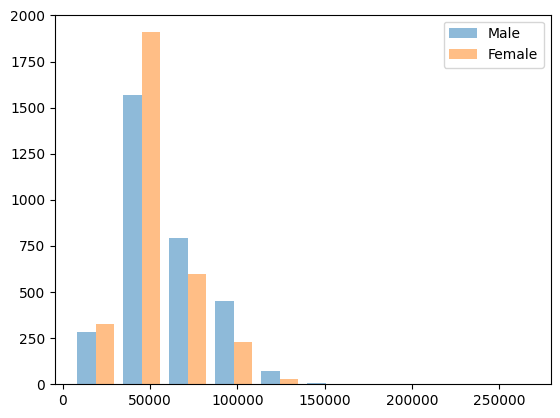

In [1372]:
male_salaries = salaries_df.loc[salaries_df['SEX'] == 'M', 'ANNUAL_SALARY']
female_salaries = salaries_df.loc[salaries_df['SEX'] == 'F', 'ANNUAL_SALARY']
plt.hist([male_salaries, female_salaries], label=['Male', 'Female'], alpha=0.5)

# add a legend and show the plot
plt.legend()
plt.show()